# Linear Regression 线性回归
我的 python 版本为 3.9


In [2]:
import pandas as pd 
import seaborn as sns 
sns.set(context="notebook", style="whitegrid", palette="dark") # 数据可视化的一些设置
import matplotlib.pyplot as plt 
import tensorflow as tf 
import numpy as np 

In [3]:
df = pd.read_csv('ex1data1.txt', names=['population','profit']) # 读取数据并赋予类名，返回 dataFrame 表格类型
df.head() # 看前五行

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
df.info() # 返回 dataFrame 的一些信息
# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 97 entries, 0 to 96 --->行数，96行
# Data columns (total 2 columns): --->列数，2列
#  #   Column      Non-Null Count  Dtype  
# ---  ------      --------------  -----  
#  0   population  97 non-null     float64 --->数据类型为float 64
#  1   profit      97 non-null     float64
# dtypes: float64(2)
# memory usage: 1.6 KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   population  97 non-null     float64
 1   profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


***
# 绘图

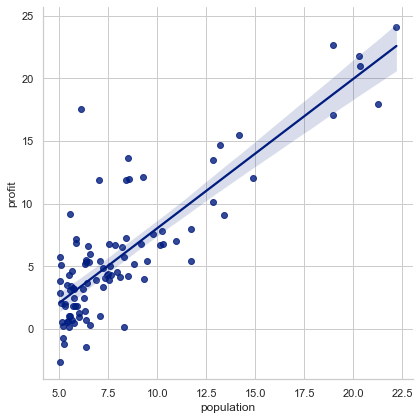

In [5]:
# parameters:
    # x,y: Input variables
    # data: 数据集
    # height: 绘制的图表尺寸
    # fit_reg: 为 True 则绘制 linear regression 模型，为 False 则不绘制
    # seabarn 为 matplotlib 的扩展
sns.lmplot(x='population', y='profit', data=df, height=6, fit_reg=True)
plt.show()

In [6]:
def get_X(df): # 读取特征,即 x0 ... xn 的矩阵
    ones = pd.DataFrame({'ones': np.ones(len(df))}) # one 是 m x 1 的 dataframe
    data = pd.concat([ones,df],axis=1)
    # data:
    # ones	population	profit
    # 0	1.0	6.1101	17.5920
    # 1	1.0	5.5277	9.1302
    # 2	1.0	8.5186	13.6620
    # 3	1.0	7.0032	11.8540
    # 4	1.0	5.8598	6.8233
    # return data.iloc[:, :-1] # 返回只有 ones 和第一列
    return data.iloc[:, : -1].values # .values 将 dataFrame 转化为多维数组
    
def get_y(df): # 读取y值
    return np.array(df.iloc[:,-1]) # 取 df 的最后一列
    
    
def normalize_feature(df):
    # apply(func): 将 func 这个函数应用于 dataFrame
    # mean(): 求平均值
    # std(): 求标准差 
    return df.apply(lambda column: (column - column.mean()) / column.std()) # 特征缩放

多变量的假设 h 表示为：$${{h}_{\theta }}\left( x \right)={{\theta }_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}$$

这个公式中有n+1个参数和n个变量，为了使得公式能够简化一些，引入${{x}_{0}}=1$，则公式转化为 $${{h}_{\theta }}\left( x \right)={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}$$

此时模型中的参数是一个n+1维的向量，任何一个训练实例也都是n+1维的向量，特征矩阵X的维度是 m*(n+1)。 因此公式可以简化为：$${{h}_{\theta }}\left( x \right)={{\theta }^{T}}X$$，其中上标T代表矩阵转置。

In [7]:
def linear_regression(X_data, y_data, alpha, epoch, optimizer=tf.optimizers.SGD): # 国外大神写的
    # 所以placeholder()函数是在神经网络构建graph的时候在模型中的占位，此时并没有把要输入的数据传入模型
    # 它只会分配必要的内存。等建立session，在会话中，运行模型的时候通过feed_dict()函数向占位符喂入数据。
    X = tf.placeholder(tf.float32, shape=X_data.shape)
    y = tf.placeholder(tf.float32, shape=y_data.shape)
    
    # construct the graph
    with tf.variable_creator_scope('linear-regression'):
        W = tf.get_variable("weight",
                            (X_data.shape[1],1),
                            initializer=tf.constant_initializer()) # n * 1
        
        y_pred = tf.matmul(X, W)  # m*n @ n*1 -> m*1

        loss = 1 / (2 * len(X_data)) * tf.matmul((y_pred - y), (y_pred - y), transpose_a=True)  # (m*1).T @ m*1 = 1*1

    opt = optimizer(learning_rate=alpha)
    opt_operation = opt.minimize(loss)

    # run the session
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        loss_data = []

        for i in range(epoch):
            _, loss_val, W_val = sess.run([opt_operation, loss, W], feed_dict={X: X_data, y: y_data})
            loss_data.append(loss_val[0, 0])  # because every loss_val is 1*1 ndarray

            if len(loss_data) > 1 and np.abs(loss_data[-1] - loss_data[-2]) < 10 ** -9:  # early break when it's converged
                # print('Converged at epoch {}'.format(i))
                break

    # clear the graph
    tf.reset_default_graph()
    return {'loss': loss_data, 'parameters': W_val}  # just want to return in row vector format

In [42]:
data = pd.read_csv('ex1data1.txt', names=['population', 'profit']) # 读取数据，并赋予列名

data.head()#看下数据前5行

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


# 计算代价函数
$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$
其中：$${{h}_{\theta }}\left( x \right)={{\theta }^{T}}X={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}$$

In [9]:
# 查看一下数据维度
X = get_X(data)
print(X.shape, type(X))

y = get_y(data)
print(y.shape, type(y))

(97, 2) <class 'numpy.ndarray'>
(97,) <class 'numpy.ndarray'>


In [10]:
theta = np.zeros(X.shape[1]) # X.shape[1] = n , 代表有 n 个特征值
print(theta)

[0. 0.]


In [11]:
def lr_cost(theta, X, y):
#     """
#     X: R(m*n), m 样本数, n 特征数
#     y: R(m)
#     theta : R(n), 线性回归的参数
#     """
    m = X.shape[0]  # 样本数

    inner = X @ theta - y 
    
    square_sum = inner.T @ inner
    cost = square_sum / (2 * m)
    return cost
    
lr_cost(theta,X,y) # 返回 J theta（代价函数）的值


32.072733877455676

### 解释
inner = X @ theta - y    这一样代码表示 $$ {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}}$$ 的矩阵形式


square_sum = inner.T @ inner 表示  $$ \sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$

所以最后 cost = $$ J\left( \theta  \right)$$

*********
# batch gradient decent（批量梯度下降）
$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right)$$

In [12]:
def gradient(theta,X,y):
    m = X.shape[0] # 样本数
    
    inner  = X.T @ (X @ theta - y) # h(x) - y * x 的 sum
    
    return inner / m

In [13]:
def batch_gradient_decent(theta, X, y, eopch, alpha=0.01):
    cost_data = [lr_cost(theta, X, y)]
    _theta = theta.copy()
    
    for i in range(eopch):
        _theta = _theta - alpha * gradient(_theta, X, y) # 更新 theta
        cost_data.append(lr_cost(_theta, X, y))
        
    return _theta, cost_data

In [14]:
eopch = 500 # 更新轮次为500次
final_theta, cost_data = batch_gradient_decent(theta, X, y, eopch)

In [15]:
final_theta # 最终的 theta 向量

array([-2.28286727,  1.03099898])

In [16]:
cost_data # 代价数据

[32.072733877455676,
 6.737190464870009,
 5.931593568604956,
 5.901154707081388,
 5.895228586444221,
 5.890094943117332,
 5.885004158443646,
 5.8799324804914175,
 5.874879094762575,
 5.869843911806386,
 5.864826865312929,
 5.859827889932181,
 5.85484692057229,
 5.849883892376587,
 5.844938740722034,
 5.840011401218361,
 5.835101809707226,
 5.830209902261388,
 5.825335615183862,
 5.820478885007099,
 5.815639648492152,
 5.810817842627869,
 5.806013404630044,
 5.801226271940628,
 5.796456382226899,
 5.7917036733806535,
 5.786968083517396,
 5.782249550975539,
 5.777548014315596,
 5.772863412319381,
 5.768195683989212,
 5.76354476854712,
 5.758910605434047,
 5.7542931343090755,
 5.749692295048629,
 5.745108027745684,
 5.740540272709014,
 5.735988970462381,
 5.731454061743792,
 5.726935487504702,
 5.722433188909257,
 5.717947107333529,
 5.713477184364749,
 5.709023361800549,
 5.704585581648199,
 5.700163786123856,
 5.695757917651815,
 5.691367918863752,
 5.686993732597982,
 5.682635301898707

In [17]:
lr_cost(final_theta, X, y)

4.713809531116866

# visualize cost data（代价数据可视化）


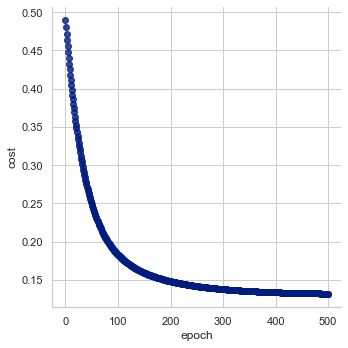

In [37]:
c = {'epoch':list(range(eopch+1)),'cost':cost_data}
cost_df = pd.DataFrame(c)
ax = sns.lmplot(x='epoch',y='cost',data=cost_df,fit_reg=False)
plt.show()
# 由下图可看出，从第一轮开始代价数据几乎垂直下降，之后趋于平稳

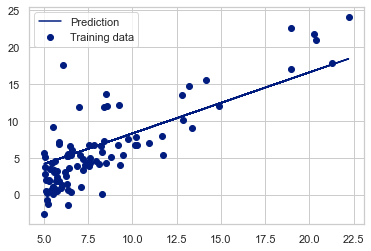

In [44]:
b = final_theta[0] # intercept，Y轴上的截距
m = final_theta[1] # slope，斜率

plt.scatter(data.population, data.profit, label="Training data")
plt.plot(data.population, data.population*m + b, label="Prediction")
plt.legend(loc=2)
plt.show()

## 附加


In [19]:
raw_data = pd.read_csv('ex1data2.txt', names=['square', 'bedrooms', 'price'])
raw_data.head()

,square,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


# 标准化数据(特征缩放)
最简单的方法是减去平均值再除以标准差


In [22]:
def normalize_feature(df):
    return df.apply(lambda column:(column - column.mean()) / column.std())

data = normalize_feature(raw_data)
data.head()

,square,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


#  multi-var batch gradient decent（多变量批量梯度下降）

In [23]:
X = get_X(data)
print(X.shape, type(X))

y = get_y(data)
print(y.shape, type(y))#看下数据的维度和类型

(47, 3) <class 'numpy.ndarray'>
(47,) <class 'numpy.ndarray'>


In [24]:
alpha = 0.01#学习率
theta = np.zeros(X.shape[1])#X.shape[1]：特征数n
epoch = 500#轮数

In [25]:
final_theta, cost_data = batch_gradient_decent(theta, X, y, epoch, alpha=alpha)

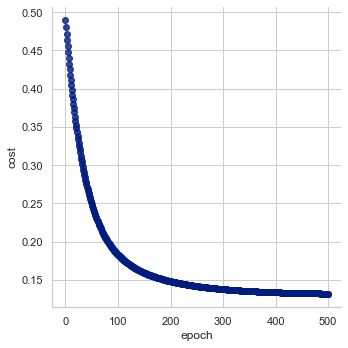

In [30]:
c = {'epoch':list(range(epoch+1)),'cost':cost_data}
cost_df = pd.DataFrame(c)
sns.lmplot(x='epoch',y='cost',data=cost_df,fit_reg=False)
plt.show()

In [45]:
final_theta

array([-1.16537985e-16,  8.30383883e-01,  8.23982853e-04])

# 3. learning rate（学习率）

In [47]:
base = np.logspace(-1, -5, num=4)
print(base)
print(base*3)
candidate = np.sort(np.concatenate((base, base*3)))
print(candidate)
# 上述代码的作用就是创建一个矩阵，矩阵元素从1*10的-5次方 到 0.1
# 意在模拟不同的 learning rate 对代价函数的影响

[1.00000000e-01 4.64158883e-03 2.15443469e-04 1.00000000e-05]
[3.00000000e-01 1.39247665e-02 6.46330407e-04 3.00000000e-05]
[1.00000000e-05 3.00000000e-05 2.15443469e-04 6.46330407e-04
 4.64158883e-03 1.39247665e-02 1.00000000e-01 3.00000000e-01]


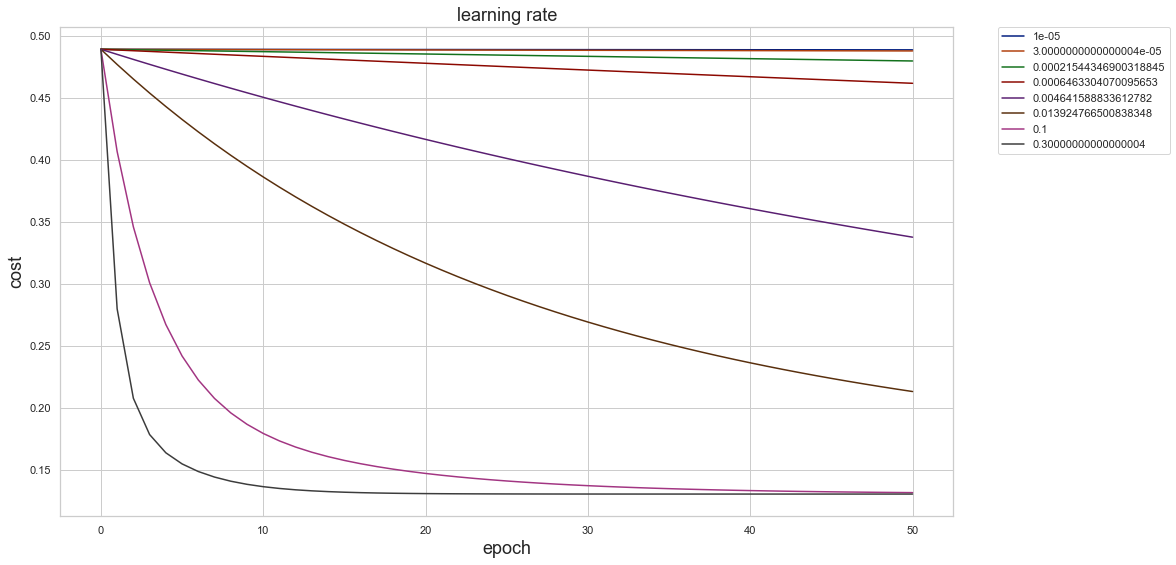

In [48]:
epoch=50

fig, ax = plt.subplots(figsize=(16, 9))

for alpha in candidate:
    _, cost_data = batch_gradient_decent(theta, X, y, epoch, alpha=alpha)
    ax.plot(np.arange(epoch+1), cost_data, label=alpha)

ax.set_xlabel('epoch', fontsize=18)
ax.set_ylabel('cost', fontsize=18)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.set_title('learning rate', fontsize=18)
plt.show()
# 模拟不同的 alpha 的影响

# 4. normal equation（正规方程）
正规方程是通过求解下面的方程来找出使得代价函数最小的参数的：$\frac{\partial }{\partial {{\theta }_{j}}}J\left( {{\theta }_{j}} \right)=0$ 。
 假设我们的训练集特征矩阵为 X（包含了${{x}_{0}}=1$）并且我们的训练集结果为向量 y，则利用正规方程解出向量 $\theta ={{\left( {{X}^{T}}X \right)}^{-1}}{{X}^{T}}y$ 。
上标T代表矩阵转置，上标-1 代表矩阵的逆。设矩阵$A={{X}^{T}}X$，则：${{\left( {{X}^{T}}X \right)}^{-1}}={{A}^{-1}}$

梯度下降与正规方程的比较：

梯度下降：需要选择学习率α，需要多次迭代，当特征数量n大时也能较好适用，适用于各种类型的模型	

正规方程：不需要选择学习率α，一次计算得出，需要计算${{\left( {{X}^{T}}X \right)}^{-1}}$，如果特征数量n较大则运算代价大，因为矩阵逆的计算时间复杂度为O(n3)，通常来说当n小于10000 时还是可以接受的，只适用于线性模型，不适合逻辑回归模型等其他模型

In [50]:
# 正规方程
def normalEqn(X, y):
    theta = np.linalg.inv(X.T @ X) @ X.T @ y
    return theta

In [51]:
final_theta2=normalEqn(X, y) 
final_theta2

array([-1.11022302e-16,  8.84765988e-01, -5.31788197e-02])